C:\Users\91773\AppData\Local\Temp\ipykernel_4012\2993484252.py:13: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  im1 = im.resize((im.width*5,im.height*5),Image.NEAREST)
C:\Users\91773\AppData\Local\Temp\ipykernel_4012\2993484252.py:14: DeprecationWarning: LANCZOS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  im2 = im.resize((im.width//15,im.height//15),Image.LANCZOS)


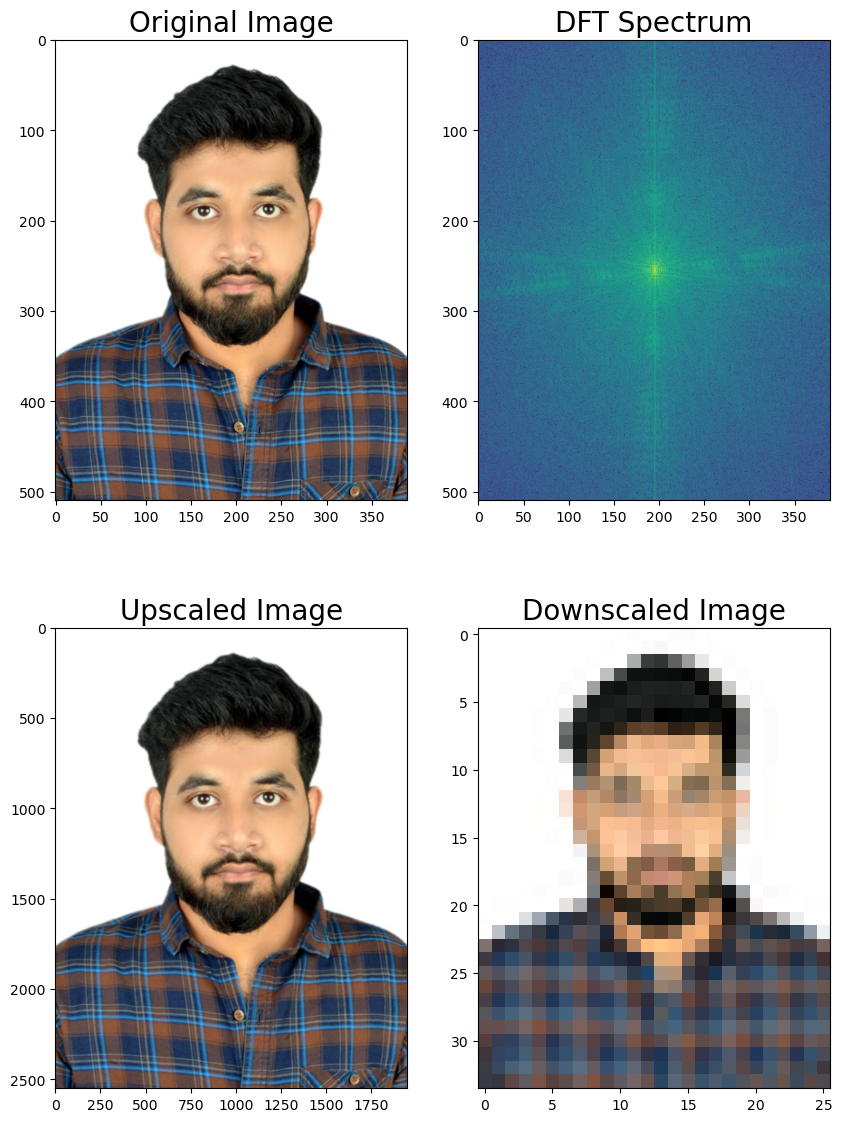

In [1]:
#Q1. Write a Program to demonstrate the following aspects of signal processing on suitable data:
#1. Up sampling and Down sampling on Image/Speech Signal.
#2. Fast Fourier Transform to compute DFT.

from PIL import Image
from skimage.io import imread, imshow, show
import numpy as np
import matplotlib.pylab as pylab
import numpy.fft as fp
from skimage.color import rgb2gray

im = Image.open('60.jpg')
im1 = im.resize((im.width*5,im.height*5),Image.NEAREST)
im2 = im.resize((im.width//15,im.height//15),Image.LANCZOS)
freq = fp.fft2(rgb2gray(im))

pylab.figure(figsize=(10,14))
pylab.subplot(2,2,1)
pylab.imshow(im)
pylab.title('Original Image',size=20)
pylab.subplot(2,2,2)
pylab.imshow(20*np.log10(0.01+np.abs(fp.fftshift(freq))))
pylab.title('DFT Spectrum',size=20)
pylab.subplot(2,2,3)
pylab.imshow(im1)
pylab.title('Upscaled Image',size=20)
pylab.subplot(2,2,4)
pylab.imshow(im2)
pylab.title('Downscaled Image',size=20)
pylab.show()

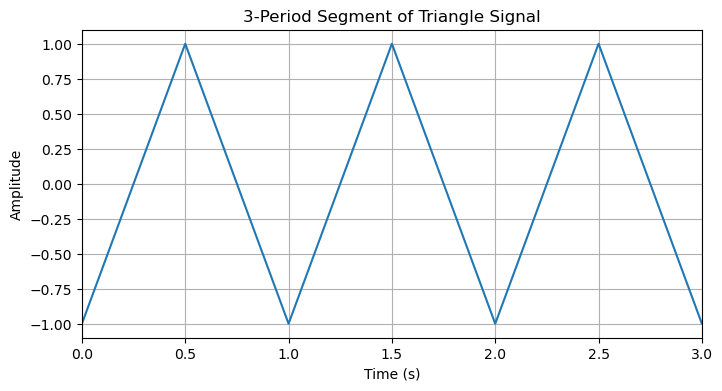

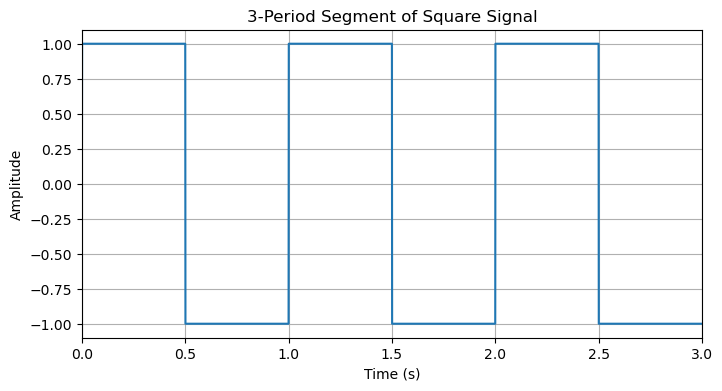

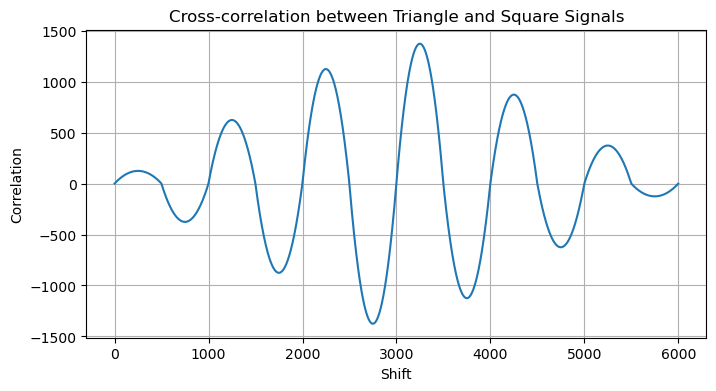

In [2]:
#Q2 Write program to perform the following on signal:
#1. Create a triangle signal and plot a 3-period segment.
#2. For a given signal, plot the segment and compute the correlation between them.

import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
frequency = 1  
duration = 3   
sampling_rate = 1000  
num_samples = int(duration * sampling_rate)  
t = np.linspace(0, duration, num_samples, endpoint=False)
triangle_signal = signal.sawtooth(2 * np.pi * frequency * t, width=0.5)
plt.figure(figsize=(8, 4))
plt.plot(t, triangle_signal, label='Triangle Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('3-Period Segment of Triangle Signal')
plt.xlim(0, 3 / frequency)
plt.grid(True)
plt.show()
square_signal = np.sign(np.sin(2 * np.pi * frequency * t))
plt.figure(figsize=(8, 4))
plt.plot(t, square_signal, label='Square Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('3-Period Segment of Square Signal')
plt.xlim(0, 3 / frequency)
plt.grid(True)
plt.show()
correlation = np.correlate(triangle_signal, square_signal, mode='full')
plt.figure(figsize=(8, 4))
plt.plot(correlation)
plt.xlabel('Shift')
plt.ylabel('Correlation')
plt.title('Cross-correlation between Triangle and Square Signals')
plt.grid(True)
plt.show()

(20, 50)


<Figure size 640x480 with 0 Axes>

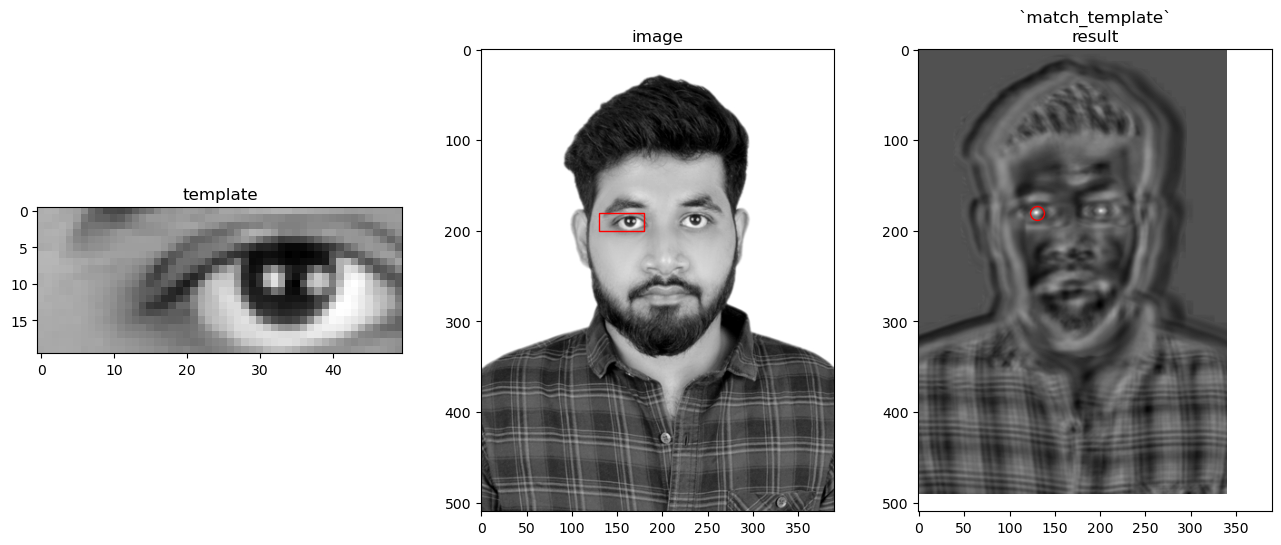

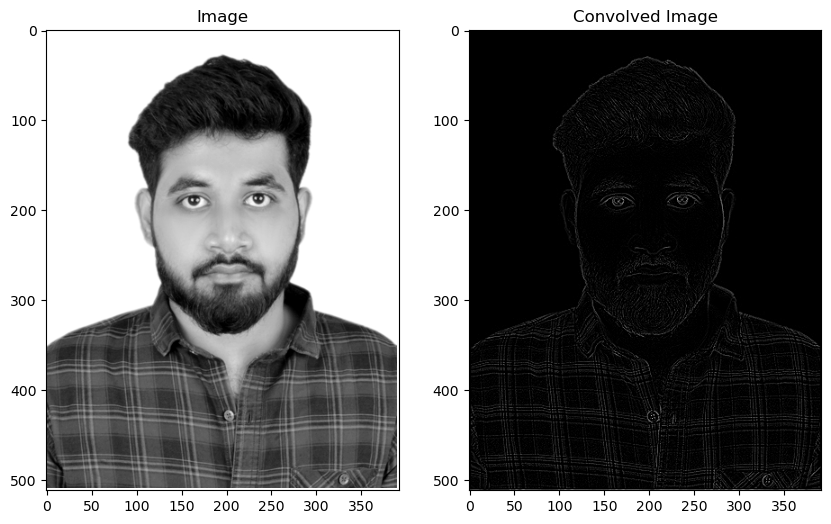

In [3]:
#Q3 Write program to demonstrate the following aspects of signal on sound/image data
#1. Convolution operation
#2. Template Matching

import numpy as np
import matplotlib.pyplot as plt
import skimage as ski 
from scipy.signal import convolve2d
image = ski.color.rgb2gray(ski.io.imread('60.jpg'))
template = image[180:200,130:180]
result = ski.feature.match_template(image,template)
ij = np.unravel_index(np.argmax(result),result.shape)
x,y = ij[::-1]
plt.gray()
fig1 = plt.figure(figsize=(16, 6))
ax1 = plt.subplot(1, 3, 1)
ax2 = plt.subplot(1, 3, 2)
ax3 = plt.subplot(1, 3, 3, sharex=ax2, sharey=ax2)
ax1.imshow(template, cmap=plt.cm.gray)
ax1.set_title('template')
ax2.imshow(image, cmap=plt.cm.gray)
ax2.set_title('image')
print(template.shape)
htemp, wtemp = template.shape
rect = plt.Rectangle((x, y), wtemp, htemp, edgecolor='r', facecolor='none')
ax2.add_patch(rect)
ax3.imshow(result)
ax3.set_title('`match_template`\nresult')
ax3.autoscale(False)
ax3.plot(x, y, 'o', markeredgecolor='r', markerfacecolor='none', markersize=10)
fig2 = plt.figure(figsize=(10,20))
ax21 = plt.subplot(1,2,1)
ax22 = plt.subplot(1,2,2, sharex=ax21,sharey=ax21)
kernel = np.array([[0,1,0],[1,-4,1],[0,1,0]])
edged = np.clip(convolve2d(image,kernel),0,1)
ax21.imshow(image,cmap=plt.cm.gray)
ax21.set_title('Image')
ax22.imshow(edged,cmap=plt.cm.gray)
ax22.set_title('Convolved Image')

plt.show()

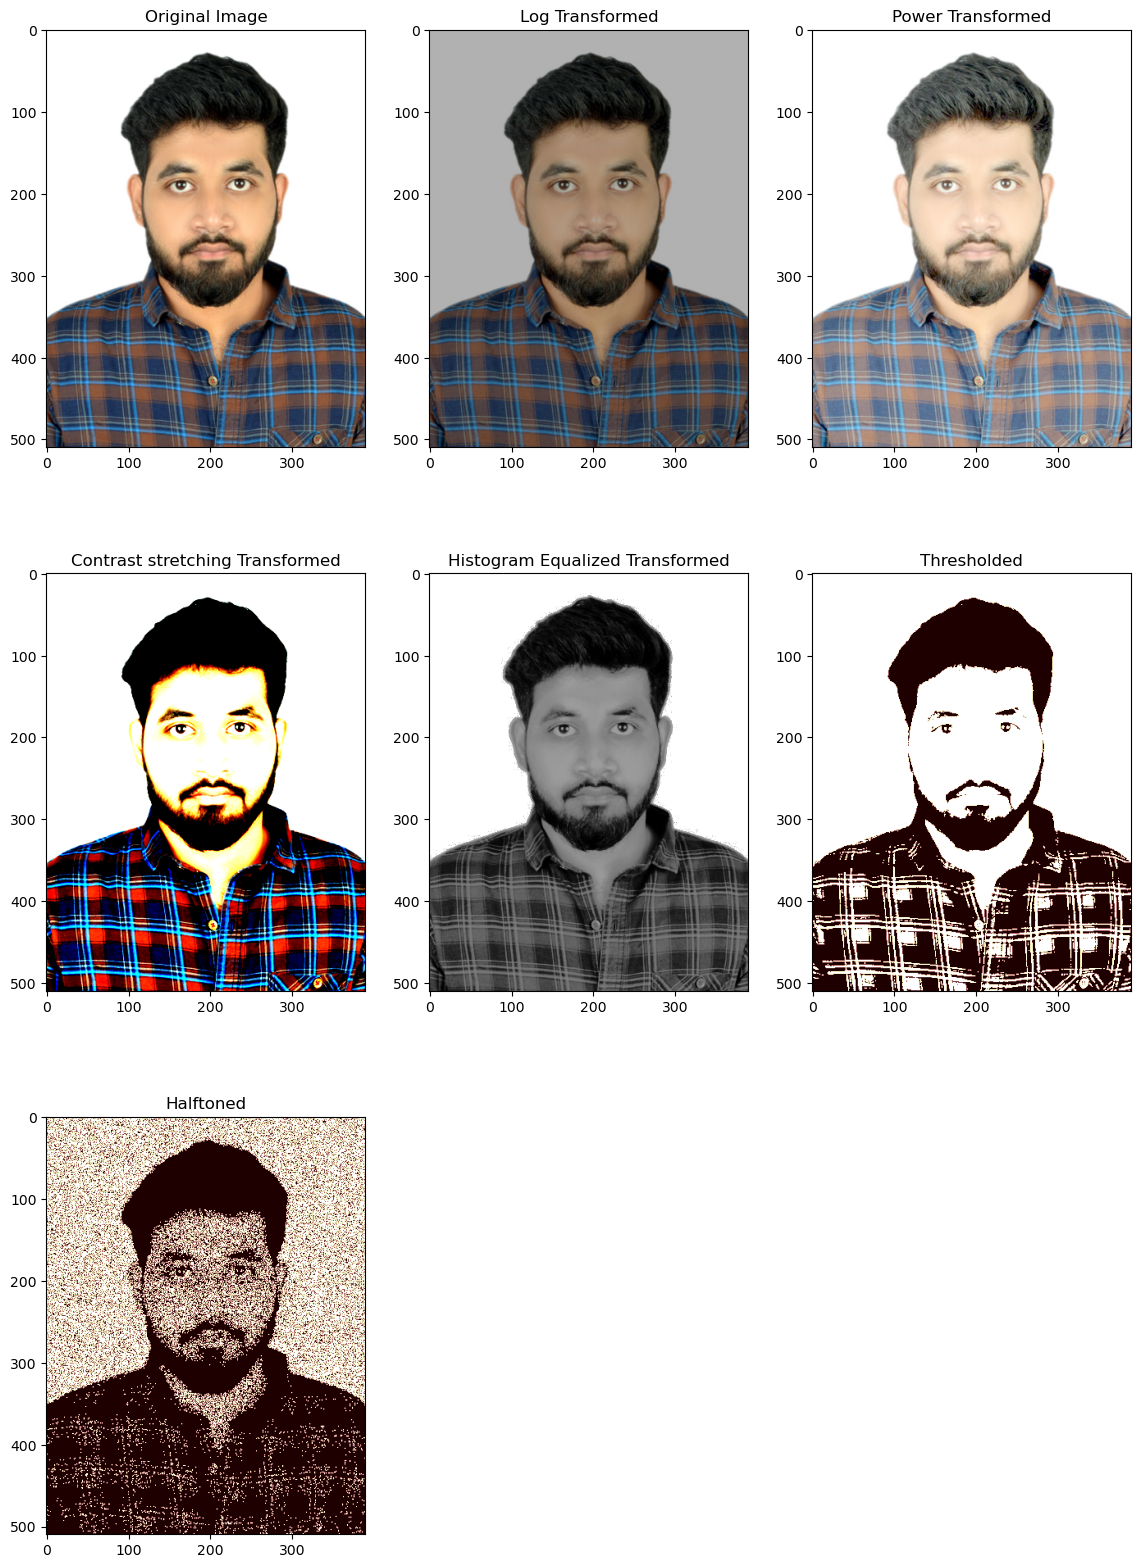

In [4]:
#Q4 Write program to implement point/pixel intensity transformations such as
#1. Log and Power-law transformations
#2. Contrast adjustments
#3. Histogram equalization
#4. Thresholding, and halftoning operations

import numpy as np
from skimage import exposure
from skimage.color import rgb2gray
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open('60.jpg')
plt.figure(figsize=(14,20))
plt.subplot(3,3,1)
plt.imshow(img,)
plt.title('Original Image')
plt.gray()
#Log Transform
plt.subplot(3,3,2)
im = img.point(lambda i: 255*np.log(1+i/255))
plt.imshow(im)
plt.title('Log Transformed')

#Power Law Transform
gamma=0.5
plt.subplot(3,3,3)
im = img.point(lambda i: 255*(i/255)**gamma)
plt.imshow(im)
plt.title('Power Transformed')

#Contrast Adjustments
def contrast(c):
    return 0 if c < 70 else (255 if c >150 else(255*c - 19950)/50)
plt.subplot(3,3,4)
im = img.point(contrast)
plt.imshow(im)
plt.title('Contrast stretching Transformed')

#Histogram Equalization
img_eq = exposure.equalize_hist(rgb2gray(img))
img_aeq = exposure.equalize_adapthist(rgb2gray(img),clip_limit=0.03)
plt.subplot(3,3,5)
im = img.point(lambda i: 255*np.log(1+i/255))
plt.imshow(img_eq)
plt.title('Histogram Equalized Transformed')

#Thresholding and Halftoning Operations
plt.subplot(3,3,6)
im = img.convert('L').point(lambda i: i > 90)
plt.imshow(im, cmap='pink')
plt.title('Thresholded')
plt.subplot(3,3,7)
im = img.convert('L')
im = Image.fromarray(np.clip(im+np.random.randint(-128,128,(im.height,im.width)),0,255).astype(np.uint8)).point(lambda i : i > 200)
plt.imshow(im,cmap='pink')
plt.title('Halftoned')
plt.show()

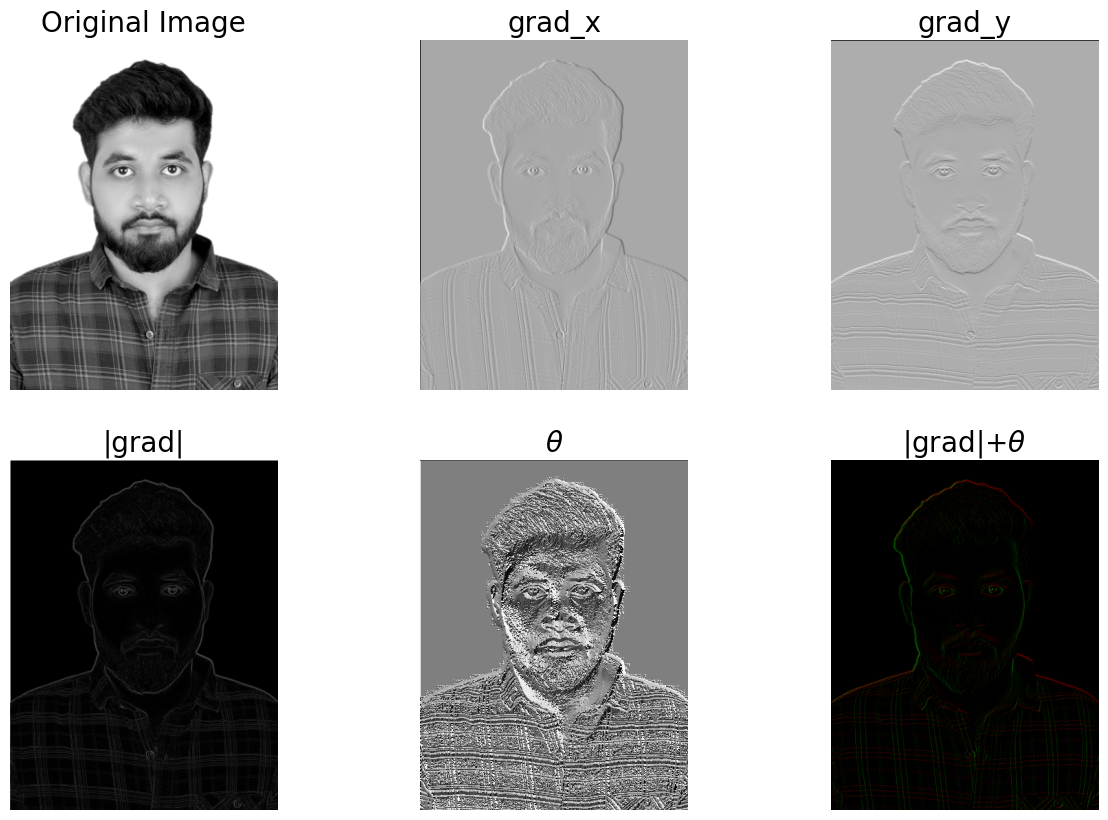

In [5]:
#Q5 Write a program to apply various enhancements on images using image derivatives by implementing Gradient and Laplacian operations.
import numpy as np
import skimage as ski
import matplotlib.pyplot as plt
import scipy as sp

def plot_image(image, title):
    plt.imshow(image), plt.title(title, size=20), plt.axis('off')

plt.figure(figsize=(15,10))
plt.gray()
plt.subplot(2,3,1)
image = ski.color.rgb2gray(ski.io.imread('60.jpg'))
plot_image(image,'Original Image')
#X-dimension gradient
plt.subplot(2,3,2)
ker_x = [[-1, 1]]
derive_x = sp.signal.convolve2d(image,ker_x,mode='same')
plot_image(derive_x,'grad_x')
#Y-dimension gradient
plt.subplot(2,3,3)
ker_y = [[-1], [1]]
derive_y = sp.signal.convolve2d(image,ker_y,mode='same')
plot_image(derive_y,'grad_y')
#Orientation
plt.subplot(2,3,4)
im_mag = np.sqrt(derive_x**2+derive_y**2)
plot_image(im_mag,'|grad|')
#direction
plt.subplot(2,3,5)
im_dir = np.arctan2(derive_y,derive_x)
plot_image(im_dir,r'$\theta$')
#Grad+dir
plt.subplot(2,3,6)
im = np.zeros((image.shape[0],image.shape[1],3))
im[...,0]=im_mag*np.sin(im_dir)
im[...,1]=im_mag*np.cos(im_dir)
im = np.clip(im,0,1)
plot_image(im,r'|grad|+$\theta$')
plt.show()

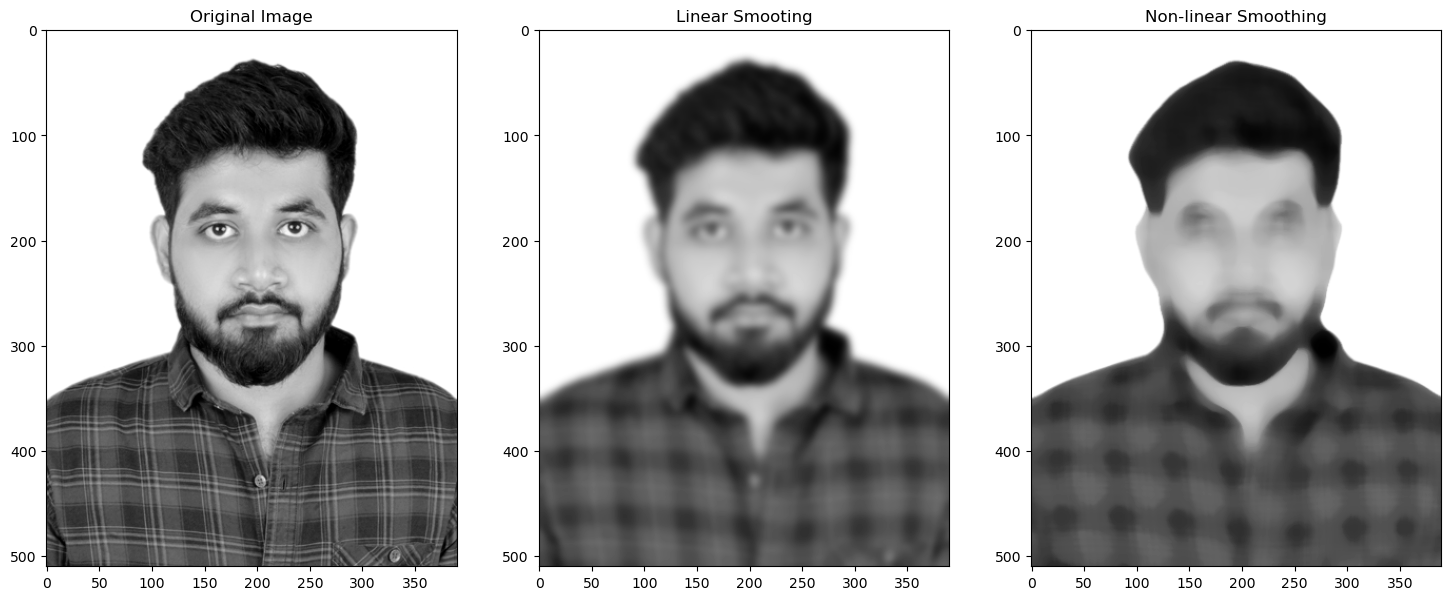

In [6]:
#Q6 Write a program to implement linear and nonlinear noise smoothing on suitable image or sound signal.
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt 

img = cv.cvtColor(cv.imread('60.jpg'),cv.COLOR_BGR2GRAY)

plt.figure(figsize=(18,10))
plt.subplot(1,3,1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

#Linear Noise Smoothing
lsimg = cv.GaussianBlur(img,(21,21),0)
plt.subplot(1,3,2)
plt.imshow(lsimg, cmap='gray')
plt.title('Linear Smooting')

#Nonlinear Noise Smoothing
lsimg = cv.medianBlur(img,21)
plt.subplot(1,3,3)
plt.imshow(lsimg, cmap='gray')
plt.title('Non-linear Smoothing')
plt.show()

<Figure size 640x480 with 0 Axes>

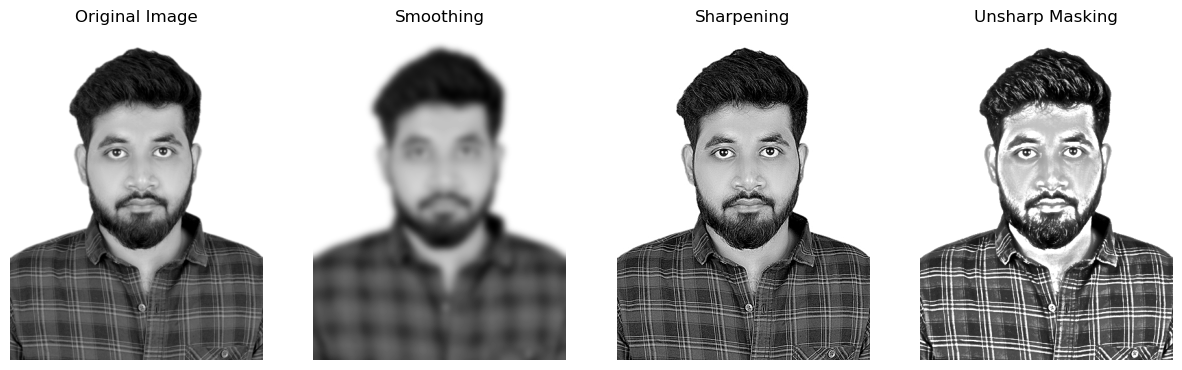

In [7]:
#Q7 Write a program to apply various image enhancement using image derivatives by implementing smoothing, sharpening, and unsharp masking filters for generating suitable images for specific application requirements.
import numpy as np
import skimage as ski
import matplotlib.pyplot as plt

def plot_image(image,title):
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')

im = ski.color.rgb2gray(ski.io.imread('60.jpg'))

plt.gray()
plt.figure(figsize=(15,9))

plt.subplot(1,4,1)
plot_image(im,'Original Image')

#smoothing
plt.subplot(1,4,2)
gausmoothim = ski.filters.gaussian(im,5)
plot_image(gausmoothim,'Smoothing')
#Sharpening
plt.subplot(1,4,3)
lapsharpim = np.clip(im+ski.filters.laplace(im),0,1)
plot_image(lapsharpim,'Sharpening')
#Unsharp Masking
plt.subplot(1,4,4)
usmaskim = np.clip(im + np.clip((im-gausmoothim),0,1)*5,0,1)
plot_image(usmaskim,'Unsharp Masking')
plt.show()
     

<Figure size 640x480 with 0 Axes>

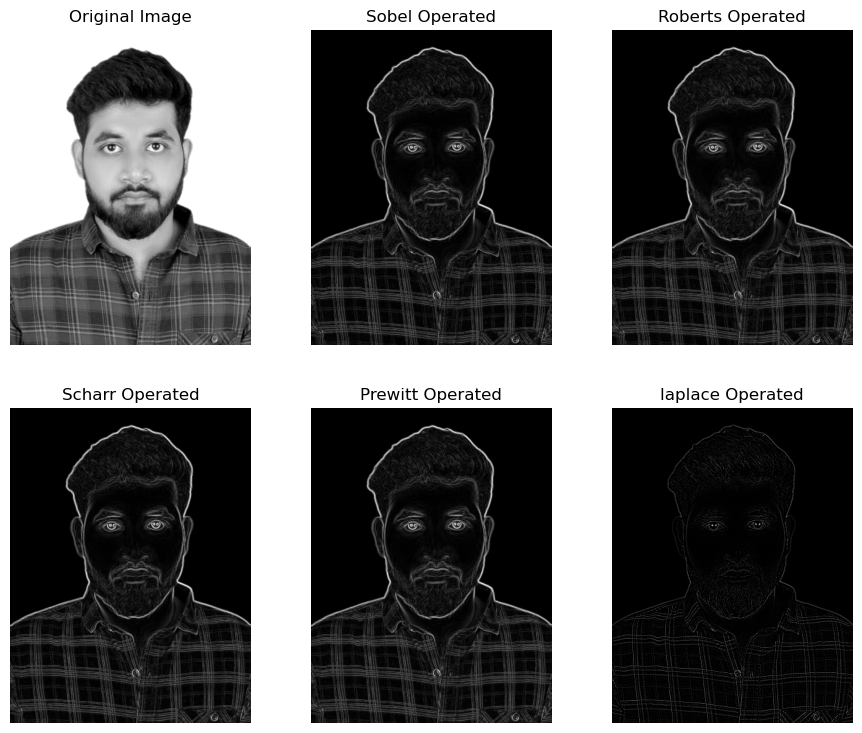

In [8]:
#Q8 Write a program to Apply edge detection techniques such as Sobel and Canny to extract meaningful information from the given image samples.
import numpy as np
import skimage as ski

import matplotlib.pyplot as plt

def plot_image(image, title):
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')

im = ski.color.rgb2gray(ski.io.imread('60.jpg'))
plt.gray()
plt.figure(figsize=(11,9))
plt.subplot(2,3,1)
plot_image(im,'Original Image')
#Sobel
plt.subplot(2,3,2)
plot_image(ski.filters.sobel(im),'Sobel Operated')
#Roberts
plt.subplot(2,3,3)
plot_image(ski.filters.sobel(im),'Roberts Operated')
#Scharr
plt.subplot(2,3,4)
plot_image(ski.filters.sobel(im),'Scharr Operated')
#Prewitt
plt.subplot(2,3,5)
plot_image(ski.filters.sobel(im),'Prewitt Operated')
#Laplace
plt.subplot(2,3,6)
plot_image(np.clip(ski.filters.laplace(im),0,1),'laplace Operated')
plt.show()

<Figure size 640x480 with 0 Axes>

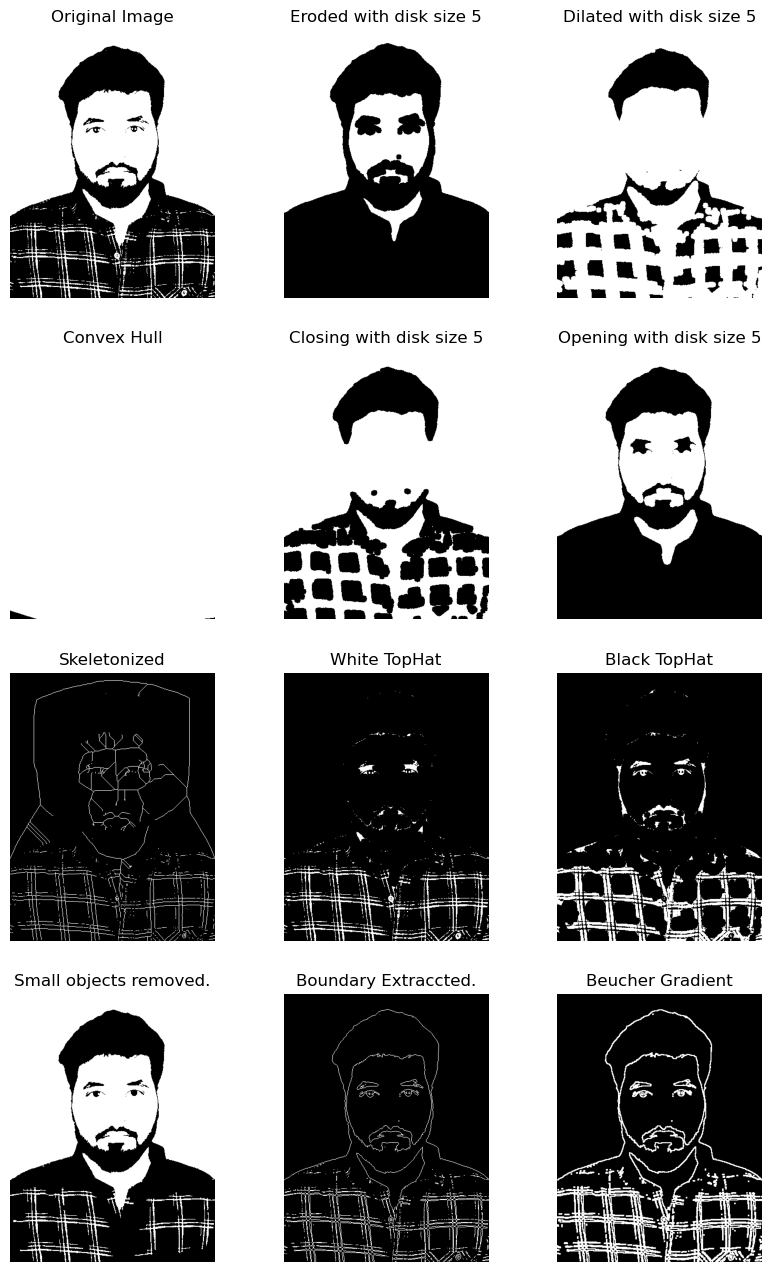

In [9]:
#Q9 Write the program to implement various morphological image processing techniques.
# Erosion, Dilation, Opening, Closing, Skeletonizing, White and Black top-hats. 
import numpy as np
import skimage as ski
import matplotlib.pyplot as plt

def plot_image(image, title=""):
    plt.title(title)
    plt.imshow(image)
    plt.axis('off')

img =  ski.color.rgb2gray(ski.io.imread('60.jpg'))
imbin = img
imbin[imbin<=0.4] = 0
imbin[imbin > 0.4] = 1
plt.gray()
plt.figure(figsize=(10,16))
plt.subplot(4,3,1)
plot_image(imbin, 'Original Image')
# Erosion
plt.subplot(4,3,2)
eroded = ski.morphology.binary_erosion(imbin, ski.morphology.disk(5))
plot_image(eroded, "Eroded with disk size 5")
#Dilation
plt.subplot(4,3,3)
dilated = ski.morphology.binary_dilation(imbin, ski.morphology.disk(5))
plot_image(dilated, "Dilated with disk size 5")
#Opening
plt.subplot(4,3,6)
opened = ski.morphology.binary_opening(imbin, ski.morphology.disk(5))
plot_image(opened, "Opening with disk size 5")
#Closing
plt.subplot(4,3,5)
closed = ski.morphology.binary_closing(imbin, ski.morphology.disk(5))
plot_image(closed, "Closing with disk size 5")
#White TopHat
plt.subplot(4,3,8)
wth = ski.morphology.white_tophat(imbin, ski.morphology.disk(5))
plot_image(wth, "White TopHat")
#BlackTopHat
plt.subplot(4,3,9)
bth = ski.morphology.black_tophat(imbin, ski.morphology.disk(5))
plot_image(bth, "Black TopHat")
#Skeletonizing
plt.subplot(4,3,7)
skeleton = ski.morphology.skeletonize(imbin)
plot_image(skeleton, "Skeletonized")
#Convex Hulling
plt.subplot(4,3,4)
chull = ski.morphology.convex_hull_image(imbin)
plot_image(chull, "Convex Hull")
#Removing Small Objects
plt.subplot(4,3,10)
rso = ski.morphology.remove_small_objects(imbin.astype(bool),500,1)
plot_image(rso, "Small objects removed.")
#Extracting Boundary
plt.subplot(4,3,11)
be = imbin - ski.morphology.erosion(imbin)
plot_image(be, "Boundary Extraccted.")
#Beucher Gradient
plt.subplot(4,3,12)
mg = ski.morphology.dilation(img,ski.morphology.rectangle(3,3)) - ski.morphology.erosion(img,ski.morphology.rectangle(3,3))
plot_image(mg, "Beucher Gradient")

plt.show()



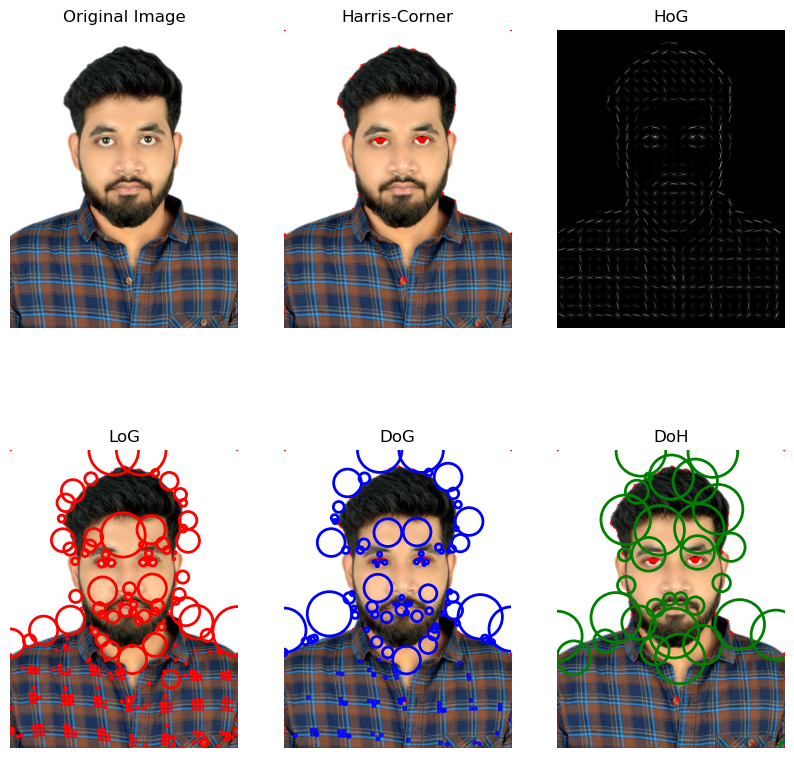

In [10]:
#Q10 Write the program to extract image features by implementing methods like corner and blob detectors, HoG and Haar features
import numpy as np
import skimage as ski
import matplotlib.pyplot as plt

def plot_image(image, title=""):
    plt.title(title)
    plt.imshow(image)
    plt.axis('off')

img = ski.io.imread('60.jpg')
imgray = ski.color.rgb2gray(img)
plt.figure(figsize=(10,10))
plt.gray()
plt.subplot(2,3,1)
plot_image(img,'Original Image')
#Harris Corner Detector
plt.subplot(2,3,2)
coordinates = ski.feature.corner_harris(imgray,k=0.001)
hcdim = img
hcdim[coordinates > 0.01*coordinates.max()]=[255,0,0]
plot_image(hcdim,'Harris-Corner')
plt.axis('off')
#Blob Detectors
#LOG
log_blobs = ski.feature.blob_log(imgray, max_sigma=30, num_sigma=10, threshold = 0.1)
log_blobs[:,2] = np.sqrt(2)*log_blobs[:,2]
plt.subplot(2,3,4)
plot_image(img, 'LoG')
for blob in log_blobs:
    y,x,rad = blob
    col = plt.Circle((x,y), rad, color = 'red', linewidth=2, fill=False)
    plt.subplot(2,3,4).add_patch(col)
plt.axis('off')
#DoG
dog_blobs = ski.feature.blob_dog(imgray, max_sigma=30, threshold = 0.1)
dog_blobs[:,2] = np.sqrt(2)*dog_blobs[:,2]
plt.subplot(2,3,5)
plot_image(img, 'DoG')
for blob in dog_blobs:
    y,x,rad = blob
    col = plt.Circle((x,y), rad, color = 'blue', linewidth=2, fill=False)
    plt.subplot(2,3,5).add_patch(col)
plt.axis('off')
#DoH
doh_blobs = ski.feature.blob_doh(imgray, max_sigma=30, num_sigma=10, threshold = 0.005)
doh_blobs[:,2] = np.sqrt(2)*doh_blobs[:,2]
plt.subplot(2,3,6)
plot_image(img, 'DoH')
for blob in doh_blobs:
    y,x,rad = blob
    col = plt.Circle((x,y), rad, color = 'green', linewidth=2, fill=False)
    plt.subplot(2,3,6).add_patch(col)
plt.axis('off')
#Histogram of Gradients
plt.subplot(2,3,3)
fd, hog_image = ski.feature.hog(imgray,orientations=8,pixels_per_cell=(16,16),cells_per_block=(1,1), visualize=True)
hog_image = ski.exposure.rescale_intensity(hog_image, in_range=(0,20))
plot_image(hog_image,"HoG")
plt.axis('off')
plt.show()


C:\Users\91773\AppData\Local\Temp\ipykernel_4012\2446788640.py:23: RuntimeWarning: divide by zero encountered in double_scalars
  y0 = (dist - 0 * np.cos(angle))/np.sin(angle)
C:\Users\91773\AppData\Local\Temp\ipykernel_4012\2446788640.py:24: RuntimeWarning: divide by zero encountered in double_scalars
  y1 = (dist - image.shape[1] * np.cos(angle))/np.sin(angle)


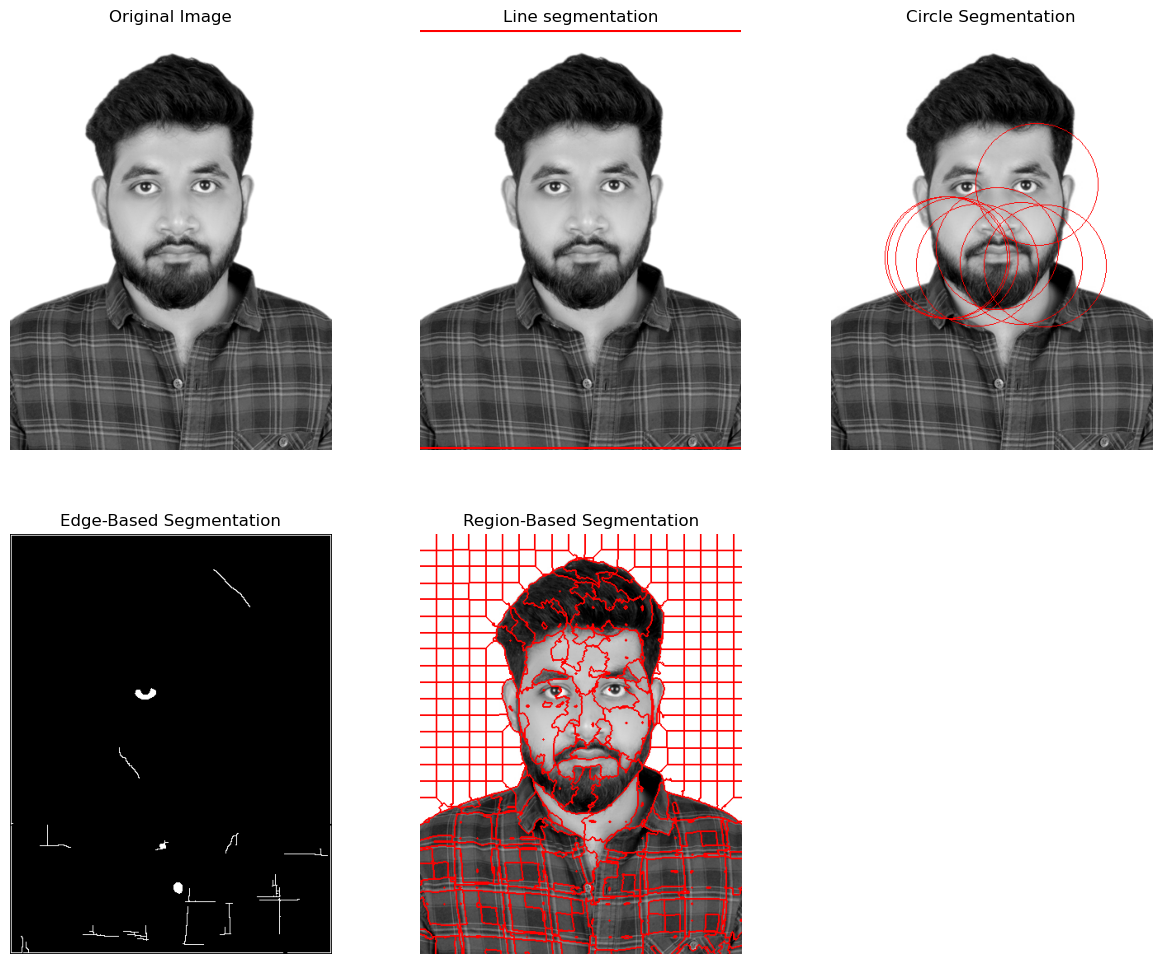

In [11]:
#Q11
import numpy as np
import skimage as ski
import matplotlib.pyplot as plt
import scipy as sp

def plot_image(image, title=""):
    plt.title(title)
    plt.imshow(image)
    plt.axis('off')

image = ski.color.rgb2gray(ski.io.imread('60.jpg'))
plt.figure(figsize=(15,12))
plt.gray()

plt.subplot(2,3,1)
plot_image(image,'Original Image')

#Straight-line hough transform
plt.subplot(2,3,2)
h, theta, d = ski.transform.hough_line(ski.feature.canny(image,2.5))
for _, angle, dist in zip(*ski.transform.hough_line_peaks(h,theta,d)) :
    y0 = (dist - 0 * np.cos(angle))/np.sin(angle)
    y1 = (dist - image.shape[1] * np.cos(angle))/np.sin(angle)
    plt.plot((0,image.shape[1]),(y0,y1),'-r')
plot_image(image, 'Line segmentation')
plt.subplot(2,3,2).set_xlim((0,image.shape[1]))
plt.subplot(2,3,2).set_ylim((image.shape[0],0))
#Circle Hough Transform
plt.subplot(2,3,3)
hough_radii = np.arange(65,75,1)
hough_res = ski.transform.hough_circle(image,hough_radii)
accums, c_x, c_y, radii = ski.transform.hough_circle_peaks(hough_res, hough_radii,total_num_peaks=8)
img = ski.color.gray2rgb(image)
for cen_y, cen_x, radius in zip(c_y,c_x,radii):
    circ_y, circ_x = ski.draw.circle_perimeter(cen_y,cen_x,radius)
    img[circ_y,circ_x] = (1,0,0)
plot_image(img,'Circle Segmentation')
#Edge-based Segmentation
plt.subplot(2,3,4)
edges = ski.feature.canny(image, sigma=2)
imces = ski.morphology.remove_small_objects(sp.ndimage.binary_fill_holes(edges),50)
plot_image(imces,'Edge-Based Segmentation')
#Region-based Segmentation
plt.subplot(2,3,5)
gradient = ski.filters.sobel(image)
segments_watershed = ski.segmentation.watershed(gradient,markers = 500, compactness=0.00001)
plot_image(ski.segmentation.mark_boundaries(image,segments_watershed,color=(1,0,0)),'Region-Based Segmentation')
plt.show()